In [19]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import os
from tqdm import tqdm

In [3]:
from fastai.vision import *

In [4]:
PATH = Path('../data/')

In [5]:
! ls {PATH}/valid

cats  dogs


In [9]:
size = 128
bs = 128
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(PATH, size=size, bs=bs, ds_tfms=tfms)

In [10]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


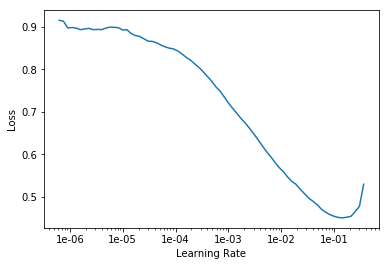

In [9]:
learn.recorder.plot()

In [12]:
lr = 0.01
learn.fit(2, lr)

epoch,train_loss,valid_loss,accuracy
1,0.125528,0.091184,0.963500
2,0.116725,0.110995,0.955000


In [13]:
learn.unfreeze()

In [14]:
lr = 0.0001
learn.fit(2, lr)

epoch,train_loss,valid_loss,accuracy
1,0.086589,0.083261,0.965500
2,0.067593,0.063765,0.975500


In [15]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)

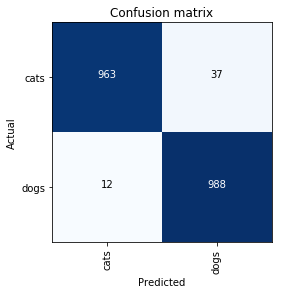

In [16]:
interp.plot_confusion_matrix()

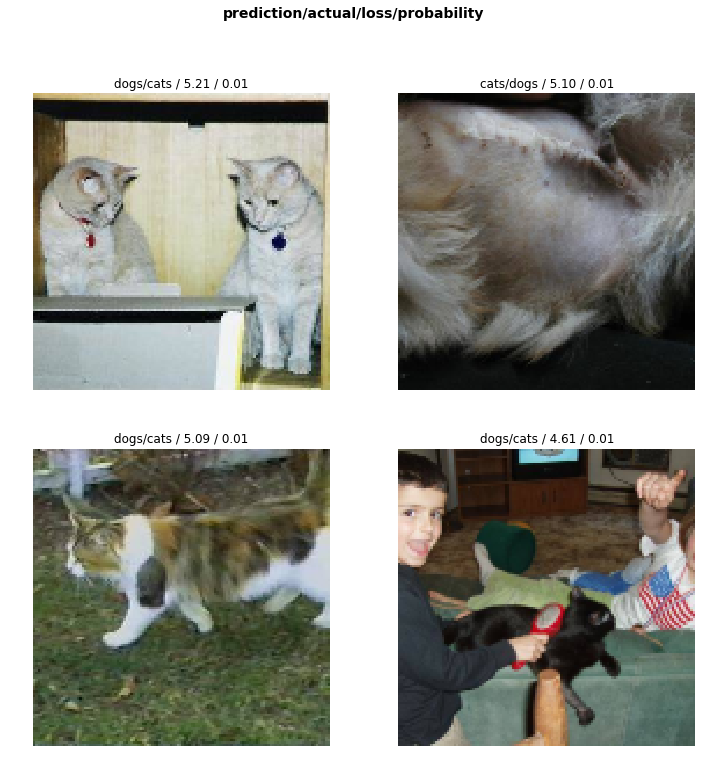

In [17]:
interp.plot_top_losses(k=4)

In [20]:
learn.export()